In [ ]:
#CSV FILE UPLOAD
from google.colab import files
uploaded = files.upload()  # Select your CSV file for upload

Saving TataMotors.csv to TataMotors.csv


In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#READING AND PRE-PROCESSING DATA
df = pd.read_csv('TataMotors.csv', parse_dates=['Datetime'])

# Check and handle missing values
print("Missing values in the dataset before handling:")
print(df.isnull().sum())

df.fillna(method='ffill', inplace=True)

# Verify that all missing values have been handled
print("Missing values after handling:")
print(df.isnull().sum())

# Final verification across the whole DataFrame
if not df.isnull().values.any():
    print("All missing values handled successfully.")
else:
    print("Some missing values remain.")

Missing values in the dataset before handling:
Datetime     0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Missing values after handling:
Datetime     0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
All missing values handled successfully.


<ipython-input-4-ad4aac240f2c>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
# EXTRACTING TIME FEATURES: Helps analyze metrics at different times of the day

df['Hour'] = df['Datetime'].dt.hour

print(df[['Datetime', 'Hour']].head(n=2990))

df['DayOfWeek'] = df['Datetime'].dt.day_name()

                      Datetime  Hour
0    2023-01-02 09:15:00+05:30     9
1    2023-01-02 10:15:00+05:30    10
2    2023-01-02 11:15:00+05:30    11
3    2023-01-02 12:15:00+05:30    12
4    2023-01-02 13:15:00+05:30    13
...                        ...   ...
2984 2024-09-27 11:15:00+05:30    11
2985 2024-09-27 12:15:00+05:30    12
2986 2024-09-27 13:15:00+05:30    13
2987 2024-09-27 14:15:00+05:30    14
2988 2024-09-27 15:15:00+05:30    15

[2989 rows x 2 columns]


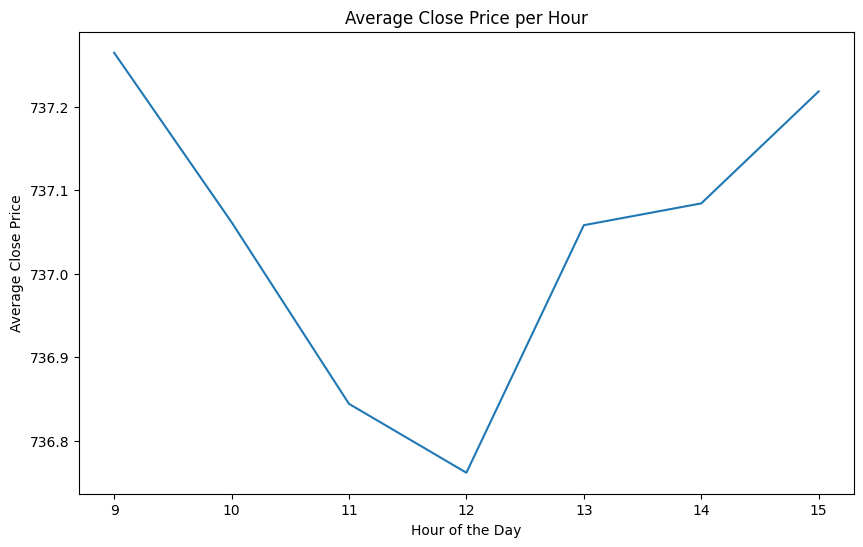

<ipython-input-6-3b59f704f268>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_analysis, x='Hour', y='Volume', palette='Blues')


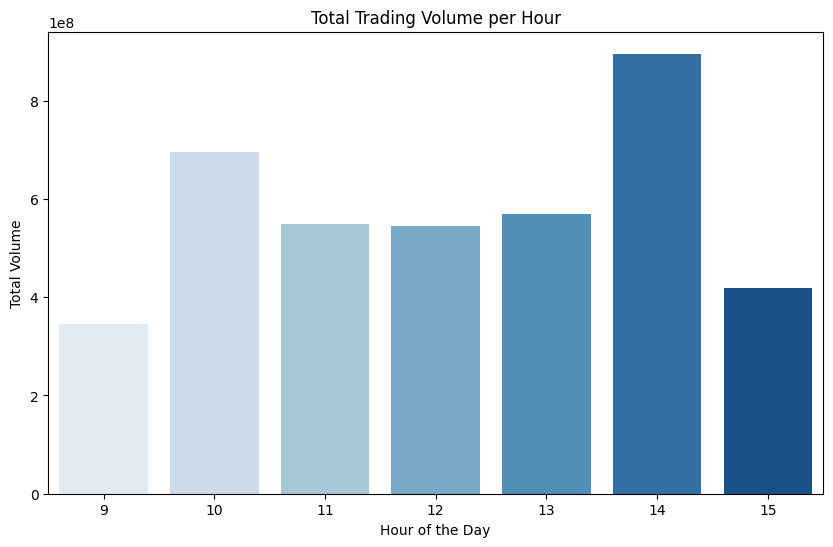

In [ ]:
# TIME OF DAY ANALYSIS:

hourly_analysis = df.groupby('Hour').agg({'Close': 'mean', 'Volume': 'sum'}).reset_index()

# Visualizing Results to Plot Hourly Trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_analysis, x='Hour', y='Close')
plt.title('Average Close Price per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Close Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=hourly_analysis, x='Hour', y='Volume', palette='Blues')
plt.title('Total Trading Volume per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Volume')
plt.show()

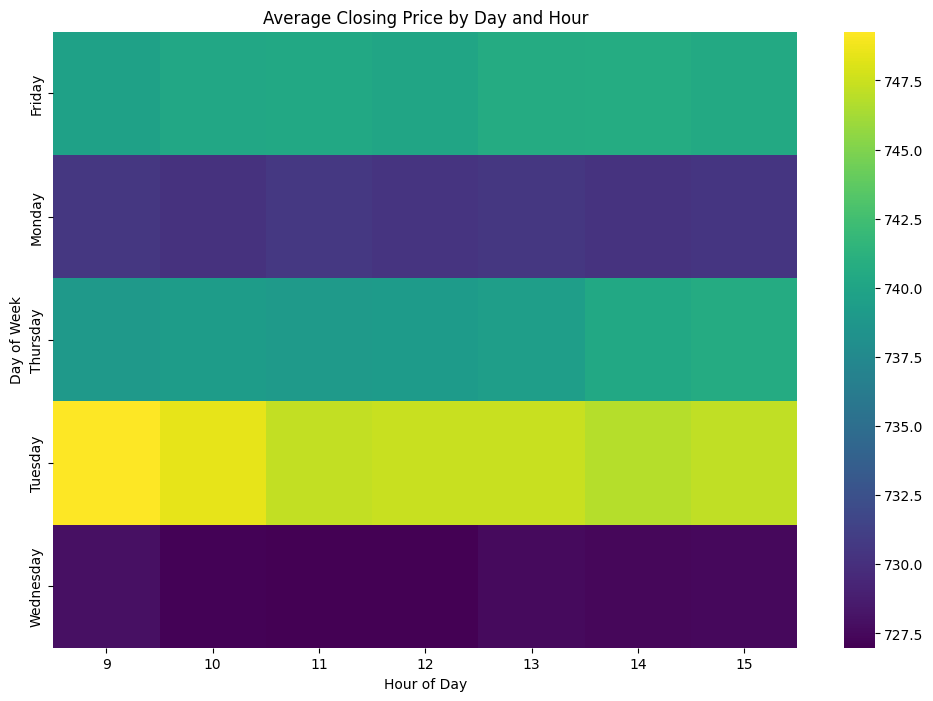

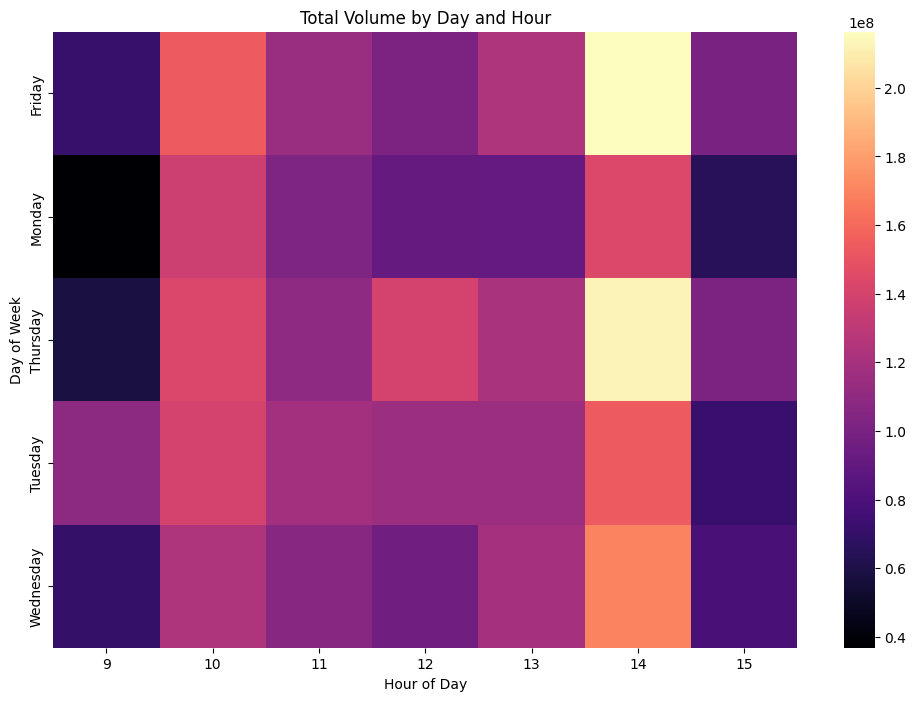

In [ ]:
# DAY-HOUR ANALYSIS AND VISUALIZATION:
day_hour_analysis = df.groupby(['DayOfWeek', 'Hour']).agg({'Close': 'mean', 'Volume': 'sum'}).reset_index()

# Visualization with Heatmap for Average Closing Price
plt.figure(figsize=(12, 8))
sns.heatmap(day_hour_analysis.pivot(index='DayOfWeek', columns='Hour', values='Close'), cmap='viridis')
plt.title('Average Closing Price by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

# Visualization with Heatmap for Total Volume
plt.figure(figsize=(12, 8))
sns.heatmap(day_hour_analysis.pivot(index='DayOfWeek', columns='Hour', values='Volume'), cmap='magma')
plt.title('Total Volume by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

     Session       Close      Volume
0  Afternoon  737.030650  2429181136
1    Morning  737.056948  1590723848


<ipython-input-8-4ce72576f01e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Session', y='Close', data=session_analysis, ax=ax[0], palette='Blues')
<ipython-input-8-4ce72576f01e>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Session', y='Volume', data=session_analysis, ax=ax[1], palette='Greens')


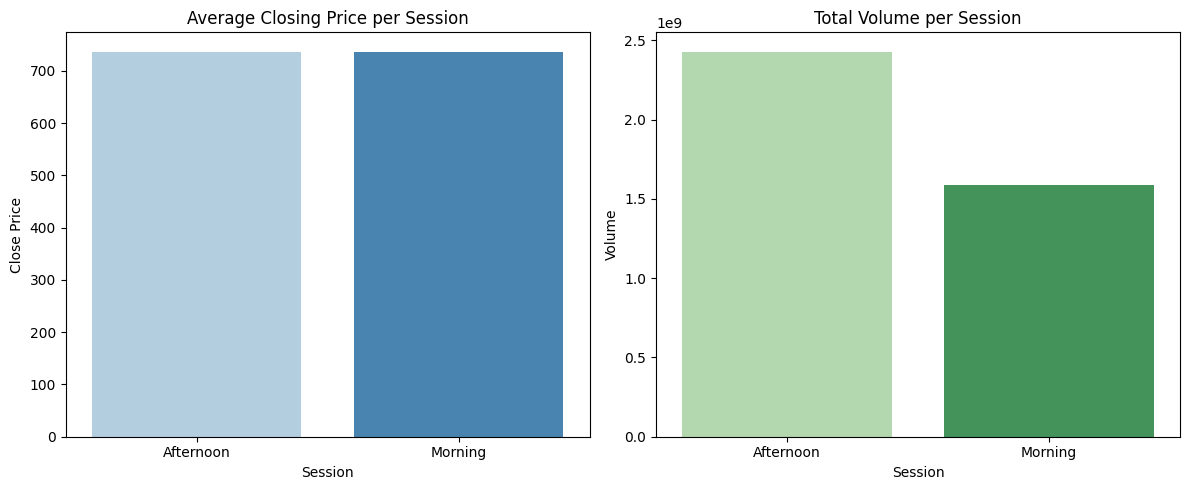

In [ ]:
# COMPARE MORNING VS. AFTERNOON PATTERNS

# Categorize hours into morning and afternoon sessions
df['Session'] = df['Hour'].apply(lambda x: 'Morning' if x < 12 else 'Afternoon')

# Group by session and calculate mean close price and total volume
session_analysis = df.groupby('Session').agg({'Close': 'mean','Volume': 'sum'}).reset_index()

print(session_analysis)

# Visualization: Bar plot for average closing price and total volume per session
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(x='Session', y='Close', data=session_analysis, ax=ax[0], palette='Blues')
ax[0].set_title('Average Closing Price per Session')
ax[0].set_ylabel('Close Price')

sns.barplot(x='Session', y='Volume', data=session_analysis, ax=ax[1], palette='Greens')
ax[1].set_title('Total Volume per Session')
ax[1].set_ylabel('Volume')

plt.tight_layout()
plt.show()

Peak Trading Hour: 
Hour             14
Volume    895921371
Name: 5, dtype: int64


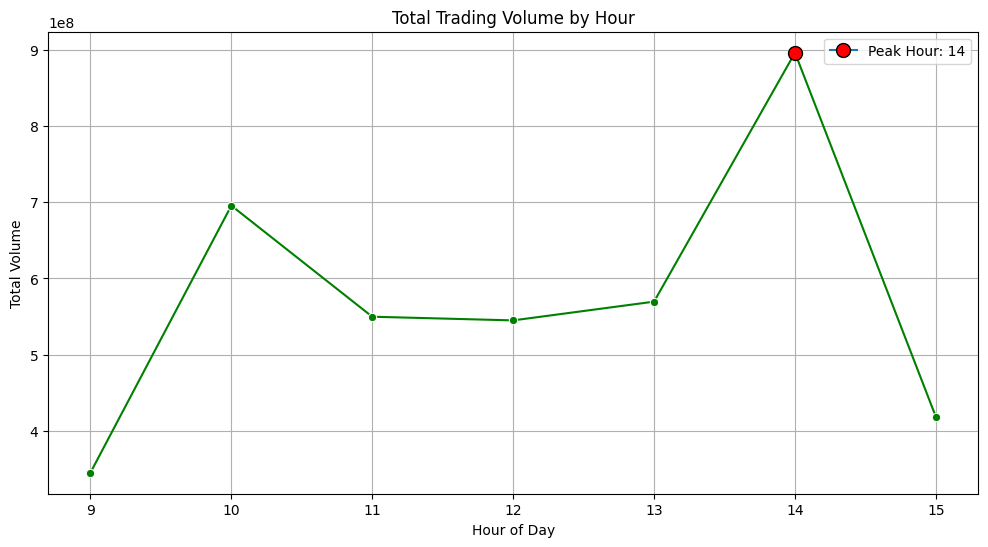

In [ ]:
#IDENTIFYING PEAK HOURS

# Group by hour to calculate total volume
hourly_volume = df.groupby('Hour').agg({'Volume': 'sum'}).reset_index()

# Find the peak hour with the highest total volume
peak_hour = hourly_volume.loc[hourly_volume['Volume'].idxmax()]
print(f"Peak Trading Hour: \n{peak_hour}")

plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Volume', data=hourly_volume, marker='o', color='green')

plt.plot(peak_hour['Hour'], peak_hour['Volume'], marker='o', markersize=10,
         markerfacecolor='red', markeredgecolor='black', label=f"Peak Hour: {peak_hour['Hour']}")

plt.title('Total Trading Volume by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Volume')
plt.legend(loc='upper right')

plt.grid(True)
plt.show()

In [ ]:
# CYCLIC TIME ENCODING

import numpy as np

# Cyclic encoding for 'Hour'
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

# DOWNLOAD ENCODED DATA AS CSV FILE

from google.colab import files
df.to_csv('cyclic_time_encoded_data.csv', index=False, encoding='utf-8-sig')
files.download('cyclic_time_encoded_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# LASSO REGRESSION FOR FEATURE SELECTION (alpha = 0.05 or alpha = 0.01)

import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Hour_sin', 'Hour_cos']]
y = df['Close']  # Predict the 'Close' price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Lasso regression:
lasso = Lasso(alpha=0.1, max_iter=10000)  # Common alpha value; max_iter = increased iterations for performing convergence
lasso.fit(X_train_scaled, y_train)

# Get selected features:
selected_features = X.columns[lasso.coef_ != 0]

print("Selected Features:\n", selected_features)

Selected Features:
 Index(['High', 'Low', 'Close'], dtype='object')


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 112ms/step - loss: 0.0304 - val_loss: 0.0011
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - loss: 0.0020 - val_loss: 0.0028
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - loss: 0.0016 - val_loss: 0.0025
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - loss: 0.0014 - val_loss: 9.4210e-04
Epoch 9/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 10/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - loss: 0.0014 - val_loss: 0.0032
Epoch 11/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - loss: 0.0013 - val_loss: 0.0041
Epoch 12/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/st

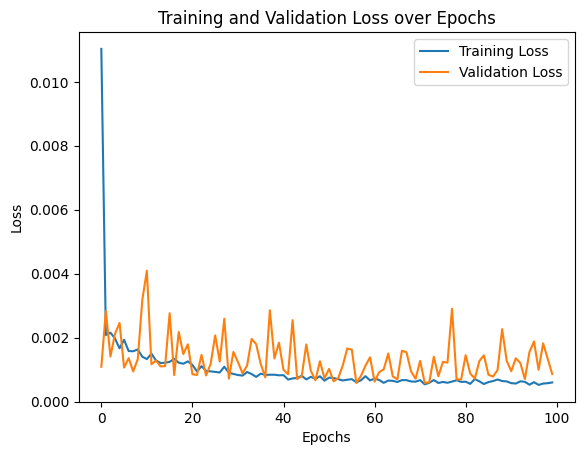

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


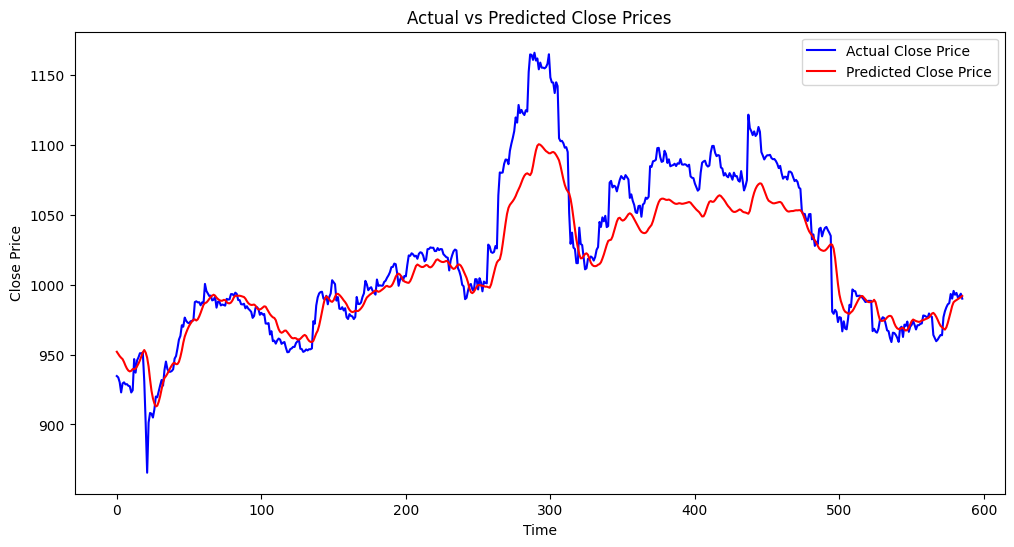

RMSE: 22.985485189809292
MAE: 16.55479655086791


In [ ]:
#LSTM MODEL: alpha=0.01

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np

df = pd.read_csv('cyclic_time_encoded_data.csv')

# Selecting final features based on Lasso and Time of Day Analysis
# Using selected features from Lasso + cyclic time encoding features
X = df[['Open', 'High', 'Low', 'Volume', 'Hour_sin', 'Hour_cos']]
y = df['Close']  # Target is 'Close' price

# Scale the selected features for LSTM

scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Converting the dataset to LSTM-compatible sequences
sequence_length = 60  # Choose sequence length based on analysis (e.g., 60 represents past 1 hour of data in minutes)
X_lstm = []
y_lstm = []

for i in range(sequence_length, len(X_scaled)):
    X_lstm.append(X_scaled[i-sequence_length:i])  # Input sequence of the last 60 records
    y_lstm.append(y_scaled[i, 0])  # Target is the next 'Close' price

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Splitting data into training and testing sets (80% train, 20% test)
split = int(0.8 * len(X_lstm))
X_train, X_test = X_lstm[:split], X_lstm[split:]
y_train, y_test = y_lstm[:split], y_lstm[split:]

# Building the LSTM model
model = Sequential()

# First LSTM layer with Dropout to prevent overfitting
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output layer for the predicted Close price
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the LSTM model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Plotting Training vs Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Making predictions on test set
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)  # Reverse scaling to original price values
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Visualizing actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, color='blue', label='Actual Close Price')
plt.plot(y_pred, color='red', label='Predicted Close Price')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Calculating RMSE and MAE for model evaluation
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
mae = mean_absolute_error(y_test_actual, y_pred)
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0334 - val_loss: 4.4398e-04
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0031 - val_loss: 4.1446e-04
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0027 - val_loss: 3.1847e-04
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0024 - val_loss: 2.9788e-04
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0024 - val_loss: 6.0246e-04
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0022 - val_loss: 2.7374e-04
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0020 - val_loss: 2.7363e-04
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0018 - val_loss: 6.0522e-04
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0020 - val_loss: 2.6695e-04
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0018 - val_loss: 2.6280e-04
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━

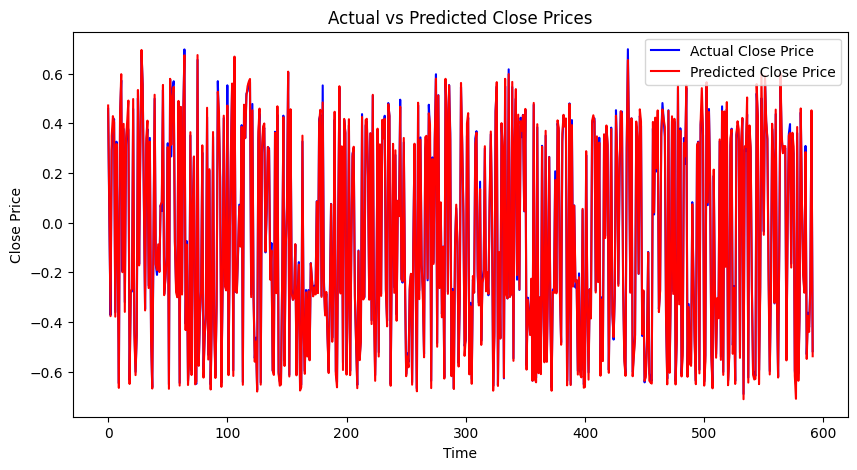

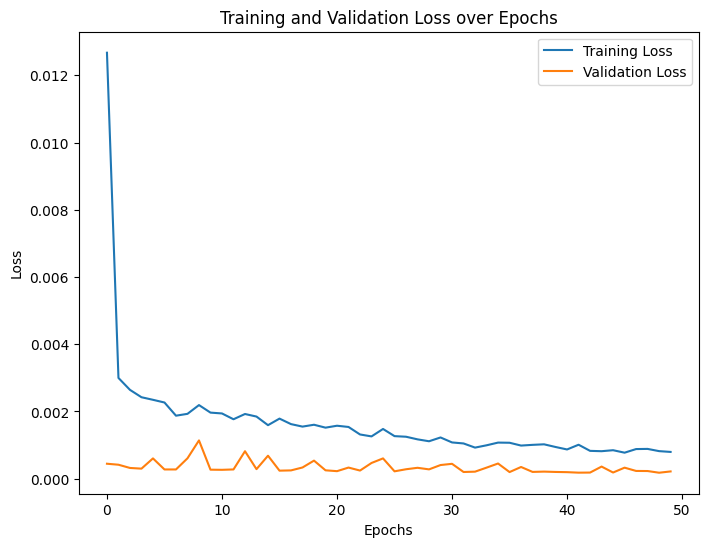

RMSE: 0.02073207076053646
MAE: 0.01508153777121211


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

df = pd.read_csv('cyclic_time_encoded_data.csv')

selected_features = ['High', 'Low', 'Close', 'Hour_sin']  # Change to actual column names
df = df[selected_features]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
# Replace 'data' with 'df' to use your dataframe
scaled_data = scaler.fit_transform(df)

# Prepare data for LSTM model
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, :])  # Last 'time_step' data points as features
        y.append(data[i, 2])  # Close price as target (index 2 corresponds to 'close' in selected features)
    return np.array(X), np.array(y)

# Create X and y datasets
time_step = 30  # You can adjust this based on what works best for your model
X, y = create_dataset(scaled_data, time_step)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Final output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(np.concatenate([X_test[:, -1, :-1], predictions], axis=1))[:, -1]
y_test_actual = scaler.inverse_transform(np.concatenate([X_test[:, -1, :-1], y_test.reshape(-1, 1)], axis=1))[:, -1]

# Assign the predictions to y_pred
y_pred = predictions  # This line is crucial

# Plot Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test_actual, color='blue', label='Actual Close Price')
plt.plot(predictions, color='red', label='Predicted Close Price')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Calculating RMSE and MAE for model evaluation
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
mae = mean_absolute_error(y_test_actual, y_pred)
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')